# <center> <span style='color:#3A40A2 '> Ejercitación módulo 4 - Segunda Parte </span></center> 

**Profesor Adjunto:** Mag. Bioing. Baldezzari Lucas

<p style='text-align: left;'> V2022 </p>

<hr style="border:1px solid gray"> </hr>

## Ejercicio 1 - Formas geométricas

Implemente lo siguiente:

- Una clase abstracta llamada *Shape()*.
- Una clase llamada *Rectangle()*, otra *Circle()* y otra *Triangle()*.
- Estas últimas clases,
    - *Circle()*: Debe tener un constructor. Además debe tener un método que permita calcular el área del círculo a partir del radio.
    - *Rectangle()*: Debe tener un constructor. Además debe tener un método que permita calcular el área del rectángulo a partir de la longitud de sus lados.
    - *Triangle()*: Debe tener un constructor. Además, debe tener un método que permita calcular el área del triángulo a partir de la base y la altura.
    
Para todas las clases -incluyendo la clase abstracta- piense qué atributos y métodos podrían tener para cumplir con lo que se pide.

Agregue breve *docstring* a cada clase.

Demuestre el funcionamiento de su implementación.

## Ejercicio 2 - Pasalo a nafta

Utilizando el ejemplo visto de herencia en la clase de teoría del módulo *Car.py* implemente un diagrama UML para representar las clases y sus interacciones. Agregue una clase *NaphthaCar()* para representar un auto a nafta que herede de la clase *Car()*.

Implemente la clase *NaphthaCar()*.

Demuestre el funcionamiento de su implementación.

## Ejercicio 3 - Formando un triángulo mediante tres puntos (obligatorio)

Implemente una clase *Triangle()*. La misma debe,

- Tener un constructor que reciba tres objetos del tipo *Punto()* (esta clase fue vista en teoría y ejercitación). Durante la creación del triángulo se debe chequear que los puntos otorgados por el usuario formen un triangulo, caso contrario deben dar un *error*, para esto implemente la siguiente linea de código,
```Python
raise ValueError("Los puntos no forman un triangulo")
```
- Debe tener un método para determinar qué tipo de triangulo es en base a la longitud de sus lados.
    - Equilatero: Tres lados iguales.
    - Isósceles: Dos lados iguales.
    - Escaleno: Ninguno de sus lados iguales.
    
- Debe tener un método para calcular el área del triángulo.
- Debe tener un método para devolver las longitudes de los lados del triángulo.

NOTA: En el módulo 5 veremos más sobre manejo de errores y excepciones.

In [4]:
# Ejercicio 3
import math

class Punto():
    

    """Clase para crear y operar puntos en un plano 2D
    
    p0 = Punto()
    p1 = Punto(3,4)
    p0.calcularDistancia(punto1) # retorna 5.0
    """
    
    def __init__(self, x:float = 0.0, y:float = 0.0) ->None:
        """Iniciamos coordenadas de los puntos.
        Si los puntos x e y no se dan, se los inicializa en el origen"""
        self.moveTo(x, y)  
    
        
    def moveTo(self, newx:float, newy:float) ->None:
        """Mueve un punto a una nueva coordenada"""
        self.x = newx
        self.y = newy
        
    def calcularDistancia(self, otroPunto: "Punto") ->float:
        """Calcula la distancia euclidiana entre dos puntos
        
        Parámetro:
            - otroPunto: Instancia de un Punto()
            
        Retorna:
            - La distancia entre puntos (float)
        """
        return math.hypot(self.x - otroPunto.x, self.y - otroPunto.y)
    
    def calcularPendiente(self, otroPunto: "Punto") ->float:
        """Calcula la distancia euclidiana entre dos puntos
        
        Parámetro:
            - otroPunto: Instancia de un Punto()
            
        Retorna:
            - La pendeinte entre puntos (float)
        """
        pendiente=(self.y-otroPunto.y)/(self.x-otroPunto.x)
        return pendiente


class Triangle():
    """nada por ahora"""
    def __init__(self, punto1:"Punto", punto2:"Punto", punto3:"Punto") ->None:
        if punto1==punto2  or punto2==punto3 or punto1==punto3:
            raise ValueError('Los puntos no forman un triangulo, puntos iguales')
        elif (punto1.x == punto2.x and punto1.x == punto3.x) or (punto1.y == punto2.y and punto1.y == punto3.y):
            raise ValueError('Los puntos no forman un triangulo, coinciden cordenadas de x o y')
        elif punto1.calcularPendiente(punto2)==punto2.calcularPendiente(punto3):
            raise ValueError('Los puntos no forman un triangulo, pendientes iguales')        
        else:
            self.punto1=punto1
            self.punto2=punto2
            self.punto3=punto3
    def getLargoLados(self):
        
        distanciaP1P2=round(self.punto1.calcularDistancia(self.punto2),2)
        distanciaP2P3=round(self.punto2.calcularDistancia(self.punto3),2)
        distanciaP3P1=round(self.punto3.calcularDistancia(self.punto1),2)
        
        return [distanciaP1P2,distanciaP2P3,distanciaP3P1]
    
    def getArea(self):
        lados=self.getLargoLados()
        perimetro = (lados[0] + lados[1] + lados[2])/2
        area= math.sqrt(perimetro * (perimetro - lados[0]) * (perimetro - lados[1]) * (perimetro - lados[2]))
        return round(area,2)
    
    def getType(self):
        lados=self.getLargoLados()
        typeTriangulo=""
        if lados[0]==lados[1] and lados[1]==lados[2]:
            typeTriangulo = "Equilatero"
        elif lados[0]==lados[1] or lados[1]==lados[2] or lados[0]==lados[2]:
            typeTriangulo = "Isoseles"
        elif (lados[0]*2)+(lados[1]*2) == (lados[2]*2):
            typeTriangulo = "Rectangulo"
        else:
            typeTriangulo = "Esacaleno"
        
        return typeTriangulo

p1=Punto(-3,-1231)
p2=Punto(-105,-7)
p3=Punto(-98,2)
triangulo1=Triangle(p1,p2,p3)
print(triangulo1.getLargoLados())
print(triangulo1.getArea())
print(triangulo1.getType())

[1228.24, 11.4, 1236.65]
4742.54
Esacaleno


## Ejercicio 4 - Señal de fotoplestimografía (obligatorio)

Implemente una clase llamada *BasicPlethy()* para obtener algunos parámetros fisiológicos a partir de datos plestimográficos.

La clase debe,

- Tener un constructor que reciba una lista de valores flotantes -señal plestimográfica- con los valores plestimográficos de cierta persona
- Un método para conocer la duración máxima (en segundos) de la señal plestimográfica. Debe retornar un valor con la duración máxima.
- Un método para conocer la frecuencia cardíaca (en latidos por minuto, lpm) a partir de la señal plestimográfica. El mismo debe retornar la frecuencia cardíaca como un valor flotante con un decimal máximo, por ejemplo, $80.2$ sería equivalente a *82.2* latidos por minuto.
- Un método para conocer los momentos en que ocurre un pico en la señal de plestmiografía. El método debe retornar una lista formada por los momentos, es decir, los segundos, en que ocurre un pico. Por ejemplo, si tuvieramos picos al segundo 1.1, al 2.2 y al 3.4 el método debería devolver la lista.

```Python
[1.1, 2.2, 3.4]
```

A continuación se presenta una propuesta inicial para la clase *BasicPlethy()*:

```Python
class BasicPlethy():
    """Doc acá..."""
    
    def __init__(self, signal:list, fm:float = 125.):
        """Doc del constructor..."""
        self.signal = signal #señal
        self.fm = fm #frecuencia de muestreo
        self.T = #TODO #Período de la señal
        self.signalDuration = #TODO # Duración de la señal (en segundos)
        
    def duration(self):
        """Returna la duración de la señal"""
        ## TODO
        
    def getHR(self)->float:
        """Calcula la frecuencia cardíaca en latidos por minutos (Heart Rate)..."""
        ## TODO
        
        return heartRate
        
    def getPeaks(self)->list:
        """Obtiene los momentos en que ocurren los picos en la señal"""
        ## TODO
        
        return peaks
```

Usted dispone de un archivo llamado *plethysmography.txt* que contiene un trozo de señal fotoplestimográfica. La misma fue obtenida de un repositorio de señales fisiológicas conocido como [Physionet](https://physionet.org/content/bidmc/1.0.0/). El archivo contiene un valor de presión por cada renglón. Deberá cargar el archivo y convertir sus valores de string a flotantes.

La siguiente imágen muestra los primeros 10 segundos de la señal contenida en el archivo de texto.

<img src="plesti.png" width=640px/>

<span style='color:#aa0000 '>**Aclaración**</span>: Puede utilizar librerias externas y generar métodos y clases que desee para poder llevar a cabo la implementación que se pide.

##### Graficando la señal de fotoplestimografía

Se podría graficar la señal utilizando el código siguiente,

```Python
from utils import graficar
graficar(signal, fm = 125, t1 = 0, t2 = 10)
```

Donde *signal* es la señal de fotoplestimografía (lista de valores flotantes), *fm* es la frecuencia de muestreo y $t_1$ y $t_2$ son los extremos (en segundos) que se quiere mostrar de la señal. 

##### Referencias

Puede encontrar información sobre plestimografía en,

- [Analisis de la onda de presion arterial en anestesiologia y cuidados intensivos](https://anestesiar.org/2020/analisis-de-la-onda-de-presion-arterial-en-anestesiologia-y-cuidados-intensivos-i/)
- [Plestimografía.pdf](Pletismografia.pdf)
- [Toward a Robust Estimation of Respiratory Rate From Pulse Oximeters](https://ieeexplore.ieee.org/document/774848)



Duracion de la señal: 8.0 min
Frecuencia Cardiaca: 94.5 ppm
Momento en el tiempo que se produce cada pico [seg]: [0.4, 1.0, 1.6, 2.3, 2.9, 3.6, 4.2, 4.9, 5.5, 6.1, 6.8, 7.4, 8.0, 8.7, 9.3, 10.0, 10.6, 11.2, 11.8, 12.5, 13.1, 13.7, 14.4, 15.0, 15.7, 16.3, 17.0, 17.6, 18.2, 18.9, 19.5, 20.1, 20.8, 21.4, 22.0, 22.7, 23.3, 24.0, 24.6, 25.2, 25.9, 26.5, 27.2, 27.8, 28.5, 29.1, 29.7, 30.4, 31.0, 31.7, 32.3, 33.0, 33.6, 34.3, 34.9, 35.6, 36.2, 36.9, 37.5, 38.2, 38.9, 39.5, 40.2, 40.8, 41.5, 42.1, 42.8, 43.4, 44.7, 45.4, 46.0, 46.7, 47.4, 48.0, 48.7, 49.3, 50.0, 50.7, 51.3, 52.0, 52.6, 53.3, 53.9, 54.6, 55.3, 56.0, 56.6, 57.3, 58.0, 58.6, 59.3, 60.0, 60.6, 61.3, 61.9, 62.6, 63.3, 63.9, 64.6, 65.2, 65.9, 66.6, 67.2, 67.9, 68.6, 69.2, 69.9, 70.6, 71.2, 71.9, 72.5, 73.2, 73.8, 74.5, 75.2, 75.8, 76.5, 77.1, 77.8, 78.5, 79.1, 79.8, 80.4, 81.1, 81.8, 82.4, 83.1, 83.7, 84.4, 85.0, 85.7, 86.3, 87.0, 87.7, 88.3, 89.0, 89.6, 90.2, 90.9, 91.5, 91.7, 91.8, 94.6, 94.6, 94.7, 94.8, 94.8, 95.5, 95.6, 95.8, 9

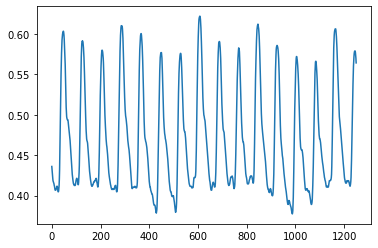

In [1]:
#LIBRERIAS
import os
#LIBRERIA QUE SE UTLIZAN DENTRO DE LA CLASE#
import matplotlib.pyplot as plt 
from scipy.signal import find_peaks

class BasicPlethy():
    """Recibe la señal de un peltismografo y es capaz de determinar la duracion de la señal,
    frencuencia cardiaca y momentos en que se produce un pico"""
    
        
    def __init__(self, signal:list, fm:float = 125.):
        """Recibe la señal en formato de lista de flotantes y la frecuencia de muestreo en flotante, por defecto 125 Hz.
        El metodo duartion permite determianr la duracion de l registro de la señal
        El metodo getHR nos permite determianr la frecuencia cardiaca atraves de la señal en pulsasiones por minuto
        El metodo getPeaks nos muestra el momento en el tiempo en que se produce un pico, en segundos"""      
        
        self.signal = signal #señal
        self.fm = fm #frecuencia de muestreo
        self.T = 1/fm #perdiodo de muestreo
        self.signalDuration = round((len(signal)*self.T)/60,2)#el largo de la señal por el periodo dividio 60 segundos nos da la duracion del registro de la señal.
        self.peaks = find_peaks(signal, height=0.45) #encuentra los picos por enciama de la altura mayor a 0.45 y nos devuelve un array donde en la poscion [0] tiene una lista con el numero de dato en que se produce el pico.
        self.numOfpeaks = len(self.peaks[0])#Cantidad de picos
        firstTenseconds = int(10/self.T)#cantidad de datos que se obtienen en 10 segundos
        plt.plot(signal[0:firstTenseconds])#se grafican los primeros 10 segundos de la muestra para una frecuencia de muestreo dada
        
    def duration(self):
        """Returna la duración de la señal"""

        return f"Duracion de la señal: %s min" % (self.signalDuration)#retorna la duracion de la señal
        
    def getHR(self)->float:
        """Calcula la frecuencia cardíaca en latidos por minutos (Heart Rate)..."""
        
        heartRate = round(self.numOfpeaks/self.signalDuration,1)#numero de picos/duracion de la señal
        return f"Frecuencia Cardiaca: %s ppm" % (heartRate)

    def getPeaks(self)->list:
        """Obtiene los momentos en que ocurren los picos en la señal"""
        peaksValue=[]
        for i in range (0,len(self.peaks[0])):
            peaksValue.append(round((self.peaks[0][i])*self.T,1))#agrega a la lista peakValue el valor del array ubicado en la lista de la poscion 0 y poscion i dentro de la lista multiplicado por el periodo, para obtener el tiempo exacto donde se origina cada pico. Con round le damos una sola cifra significativa.
        return f"Momento en el tiempo que se produce cada pico [seg]: %s " % (peaksValue)
    def getGraf(self):
        return plt.plot(signal[0:firstTenseconds])#se grafican los primeros 10 segundos de la muestra para una frecuencia de muestreo dada
 
#ABRIR EL ARCHIVO Y ASIGANRLO A UNA LISTA DE FLOTANTES
archivo=open("plethysmography.txt",'r')#abre el archivo 
vector = list(map(float,(archivo.read().split()))) #se asigna el contendio del archivo a una lista de enteros

#INSTANCIAR
señal1=BasicPlethy(vector,125.0)

print (señal1.duration())
print (señal1.getHR())
print (señal1.getPeaks())

## Ejercicio 5 - Procesando imágenes (obligatorio)

En este ejercicio realizará un programa para poder realizar procesamiento básico sobre imágenes *RGB* en escala de grises (aunue podrían ser en colores).

### <span style='color:#035397'>Imágenes para procesar</span>

Usted dispone de algunas imágenes en jpg en escala de grises (dentro de la carpeta *images*) con las cuales probar su implementación. Las imágenes son del tipo RGB, es decir, que cada imágen tiene tres capas o *canales*, donde cada canal es una matríz de $M\times N$ en donde cada coorenada $(m,n)$ de la imágen es un píxel. Cada pixel puede tomar valores entre 0 y 255 (enteros). Un 0 es igual a negro y 255 es blanco, los valores intermedios serían *grises*.

Los nombres de las imágenes son,

- bote.jpg
- brainvessels1.jpg
- brainvessels2.jpg
- broadway_tower_grayscale.jpg
- buildings.jpg
- cerebral-angiography_thumb.jpg
- coronary1.jpg
- coronary4.jpg
- coronary-angiogram.jpg
- leon.jpg
- leona.jpg

### <span style='color:#E04D01 '>Clase Image()</span>


Implemente una clase que se llame *Image* la cual deberá tener los siguientes métodos.
- Un constructor que genere una matriz de dimsensión *MxNx3* donde M es la cantidad de *filas*, N es la cantidad de *colúmnas* y el $3$ representa que es una imágen *RGB*. Cada coordenada $M_j N_j$ representa un píxel de la imágen. El constructor debe,
    - Generar un objeto *Image* a partir de una matriz de *MxNx3* que contenga una imágen.
    - Generar un objeto *Image* a partir de leer un archivo jpg.
    - Si no se da una matriz o un nombre de un archivo jpg entonces el contructor debe arrojar un error (ver implementación de ejemplo debajo).
- Un método llamado *loadImage()* el cual servirá para cargar la imágen a partir del nombre del archivo.
- Un método llamado *saveImage()* el cual servirá para guardar una imágen en formato jpg.
- Un método llamado *showImage()* el cual servirá para mostrar la imágen.
- Un método llamado *size()* que debe retornar una tupla de la forma (filas, columnas, 3).

*Comentarios*

Utilice el siguiente tutorial de la librería *matplotlib* llamado *[Image tutorial](https://matplotlib.org/stable/tutorials/introductory/images.html#sphx-glr-tutorials-introductory-images-py)* para cargar, guardar y visualizar imágenes. Aprenderemos más sobre *matplotlib* en las próximas clases.

#### <span style='color:#CC0000 '>Importante</span>

Se recomienda utilizar Visual Studio.

Guarde su implementación en un archivo *image.py*.

A continuación se propone un esquema inicial de la clase *Image*.

```Python
"""Clase Image para el ejercicio de la Ejercitación Módulo 4 - Segunda Parte"""

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

class Image():
    """Documentación de Image"""

    def __init__(self, image:"numpy.Array" = None, filename:str = ""):
        """Crea una matriz 2D a partir de image o de filename"""

        if image:
            self.image = image
            self.fil = #TODO #número de filas
            self.col = #TODO #número de columnas
        elif filename:
            self.image = self.loadImage(filename)
            self.fil = #TODO #número de filas
            self.col = #TODO #número de columnas
        else:
            raise ValueError("No se ha dado una imágen ni un archivo")

    def loadImage(self, filename:str):
        """Cargamos imágen"""
        pass

    def showImage(self):
        """Mostramos imágen"""
        pass

    def size(self):
        """Retorna una tupla de la forma (filas, columnas)"""
        pass

    def saveImage(self, filename:str):
        """Guarda la imágen en un archivo jpg"""
        pass
```

### <span style='color:#E04D01'>Módulo *procesImage*</span>

Implemente un módulo que tenga las siguientes funciones para trabajar sobre objetos *Image()*.

#### <span style='color:#CC0000 '>Importante</span>

Se recomienda utilizar Visual Studio.

Guarde su implementación en un archivo *image.py*.

<span style='color:#EC994B'>**ajustarBrillo()**</span>

La cual sirve para ajustar el brillo de una imágen en blanco y negro. Esta función debe recibir:

- Un objeto del tipo *Image()*.
- Un valor entero para saber cuanto ajustar el brillo. Este valor puede ser positivo o negativo, tomando valores entre -255 y 255.

La función debe retornar una nueva imágen como un objeto *Image()* con el brillo ajustado.

<span style='color:#EC994B'>**getHistograma()**</span>

Esta función sirve para obtener el histograma de cada canal de la imágen RGB. El histograma es simplemente las veces que un valor de píxel determinado aparece en la imágen.

La función debe recibir un objeto del tipo *Image()* y retornar una matriz de dimensiones $256 \times 3$. Donde $256$ representa los valores que un píxel puede tomar y $3$ son los canales R, G y B.

<span style='color:#EC994B'>**getChannels()**</span>

Esta función debe recibir una imágen (objeto *Image()*) y debe retornar tres objetos *Image()* en donde cada una de estas corresponde a cada canal de la imágen original. Es decir, debe devolver el canal R, el G y el B por separado.

<span style='color:#EC994B'>**ajustarContraste()**</span>

La cual sirve para ajustar el contraste de la imágen. La fórmula más sencilla para modificar el contraste esta dada por,

$$ f(x) = α(x−128) + 128 $$

Donde $x$ representa un píxel correspondiente a alguno de los R, G o B. Por otro lado, los valores de pendiente donde $α>1$ implica mayor contraste y valores $0<α<1$ implican menores contrastes.

Esta función debe recibir:

- Un objeto del tipo *Image()*.
- Un valor de $α$.

La función debe retornar un objeto *Image()* con el contraste ajustado.

<span style='color:#EC994B'>**aplicarLog()**</span>

Es posible aplicar una función a cada píxel de una imágen y así obtener una imágen *transformada*. Una de las funciones de transformación que se utilizan en procesamiento de imágenes es la función *[logarítmo](https://en.wikipedia.org/wiki/Logarithm)*. La cual para nuestro caso en particular la función a aplicar es,

$$ g(i,j)=c.log(1+f(i,j)) $$

Donde $g(i,j)$ es el valor de un píxel transformado en las coordenadas $(i,j)$ y $c$ esta definido como,

$$ c=\frac{255}{log[1+max(f(i,j))]} $$

El valor $max(f(i,j))$ representa el máximo valor de los píxeles en una determinada imágen. Esto sirve para *normalizar* los valores de la imágen transformada.

La función *aplicarLog()* debe recibir una imágen (objeto *Image*) y retornar una nueva imágen (objeto *Image*) luego de aplicarle la transformación mencionada.

<span style='color:#EC994B'>**ajustarGamma()**</span>

Otra función de transformación para modificar el rango dinámico de una imágen muy utilizada en el procesamiento digital de imágenes es lo que se llama *corrección Gamma* o *corrección de potencia*, el cual esta dado por.

$$ g(x,y)=c.f(x,y)^γ $$

Donde el valor de $c$ esta dado por,

$$ c=\frac{255}{max(f(x,y)^γ} $$

El valor de $γ$ siempre debe positivo. La figura debajo muestra la forma de la transformación de correción de potencia para diferentes valores Gamma.

<img src="gamma.png" width=380px/>

La implementación de *ajustarGamma()* debe recibir,
- Una imágen (objeto *Image*).
- Un valor de Gamma (siempre mayor a 0).

Debe retornar una nueva imágen (objeto *Image*) la cual es el resultado de aplicar la correción Gamma a cada píxel de la imágen recibida.

<span style='color:#EC994B'>**aplicarKernel()**</span>

La función **aplicarKernel()** debe,

- Recibir una imágen como un objeto del tipo *Image()*.
- Un Kernel (matriz de mxn) para aplicar sobre la imágen.

La función debe retornar una imágen (objeto *Image*) filtrada con el kernel.

**¿Qué es un Kernel y cómo lo aplico a una imágen?**

En procesamiento de imágenes, un *kernel*, una *matriz de convolución* o también llamado *máscara* es una pequeña matriz utilizada para difuminar, detectar bordes, disminuir ruidos, entre otras aplicaciones. Esto se logra realizando una operación entre el kernel y la imágen que se quiere procesar.

La fórmula de convolución entre un kernel y una imágen esta dada por,

$$ G(i,j) = h \ast F(i,j) = \sum_{m=-k}^{k}\sum_{n=-k}^{k} h(m,n)F(i-m, j-n) $$

Donde $G(i,j)$ es el valor del píxel en las coordenadas $(i,j)$ luego de aplicar el kernel, $F(i,j)$ es el valor del píxel en las coordenadas $(i,j)$ de la imágen original, $h$ es el kernel.

El resultado de aplicar la operación anterior entre una imágen y un kernel es una imágen rotada $180°$. Por lo tanto, para que esto no suceda lo mejor es rotar el kernel $180°$ y luego aplicar la operación. Haciendo esto último se logra que la operación entre el kernel y la imágen sea más sencilla de llevar a cabo ya que ahora, los coeficientes del kernel en los índices $(m,n)$ se corresponden con los elementos en las posiciones $(i,j)$ de la imágen. La operación es similar a colocar el kernel delante de una porción de la imágen, multiplicar los coeficientes del kernel con cada píxel de la imágen y sumarlos, dando como resultado un nuevo valor de píxel.

La siguiente imágen muestra un ejemplo de como se calcula el valor de un pixel aplicando convolución luego de haber rotado el kernel 180°.

![Ejemplo de convolución entre una imágen y un kernel 3x3](conv2D.png)

Como vemos, es un proceso *iterativo* donde el kernel o máscara se va moviendo por toda la imágen para lograr el filtrado.

**Formula utilizada en procesamiento de imágenes**

En procesamiento de imágenes donde intervienen kernels se utiliza la siguiente formula.

$$ Valor Píxel = \frac{\sum_{i=0}^{q}\sum_{j=0}^{q} h(i,j)F(i,j)}{C}$$

Donde,

- $h(ij)$: Es el valor del coeficiente del kernel en la posición $(i,j)$.
- $F(ij)$: Es el valor del píxel de la imágen que se corresponde con la posición $(i,j)$.
- $q$: Es la dimensión del kernel. Habitualmente $q=3$, es decir, un kernel de 3x3.
- $C$: Es la suma de los coeficientes que forman el kernel. En el caso de que sumen cero, $C$ se iguala a 1.
- $Valor Píxel$: Es el valor que toma el píxel luego de haber aplicado la operación entre el kernel y el píxel. Si la operación da menor a cero, entonces debe hacerse $Valor Píxel = 0$, o si es mayor a 255 debe hacerse $Valor Píxel = 255$

A continuación se deja una propuesta de las funciones a realizar. Usted puede agregar lo que crea necesario. Puede utilizar cualquier librería para resolver el ejercicio.

```Python

from image import Image
import numpy as np

def ajustarBrillo(image, ajuste):
    """Doc..."""
    pass

def getHistograma(image):
    """Doc..."""
    pass

def getChannels(image):
    """Doc..."""
    pass

def ajustarContraste(image, alfa):
    """Doc..."""
    pass

def ajustarGamma(image, gamma):
    """Doc..."""
    pass

def aplicarKernel(image, kernel):
    """Doc..."""
    pass

def main():
    #Mostrar su implementación aquí
    pass

if __name__ == '__main__':
    main()
    
```

### <span style='color:#035397'>Referencias</span>

- [Digital Image Processing for Medical Applications](https://www.cambridge.org/highereducation/books/digital-image-processing-for-medical-applications/A6C7860289D03363EB1DE2C37E88B2A7)
- [La CONVOLUCIÓN en las REDES CONVOLUCIONALES](https://www.youtube.com/watch?v=ySbmdeqR0-4&ab_channel=CodificandoBits)
- [Image Kernels](https://setosa.io/ev/image-kernels/)
- [Intuitively Understanding Convolutions for Deep Learning](https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1#:~:text=The%202D%20convolution%20is%20a,into%20a%20single%20output%20pixel.)
- [Convolutions in image processing | Week 1 | MIT 18.S191 Fall 2020 | Grant Sanderson](https://www.youtube.com/watch?v=8rrHTtUzyZA&ab_channel=TheJuliaProgrammingLanguage)
- [Convolution vs Cross Correlation](https://www.youtube.com/watch?v=C3EEy8adxvc&ab_channel=Udacity)
